In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')

In [8]:
data.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [9]:
data.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
data.Category.describe()

count                962
unique                25
top       Java Developer
freq                  84
Name: Category, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Data Science'),
  Text(1, 0, 'HR'),
  Text(2, 0, 'Advocate'),
  Text(3, 0, 'Arts'),
  Text(4, 0, 'Web Designing'),
  Text(5, 0, 'Mechanical Engineer'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Health and fitness'),
  Text(8, 0, 'Civil Engineer'),
  Text(9, 0, 'Java Developer'),
  Text(10, 0, 'Business Analyst'),
  Text(11, 0, 'SAP Developer'),
  Text(12, 0, 'Automation Testing'),
  Text(13, 0, 'Electrical Engineering'),
  Text(14, 0, 'Operations Manager'),
  Text(15, 0, 'Python Developer'),
  Text(16, 0, 'DevOps Engineer'),
  Text(17, 0, 'Network Security Engineer'),
  Text(18, 0, 'PMO'),
  Text(19, 0, 'Database'),
  Text(20, 0, 'Hadoop'),
  Text(21, 0, 'ETL Developer'),
  Text(22, 0, 'DotNet Developer'),
  Text(23, 0, 'Blockchain'),
  Text(24, 0, 'Testing')])

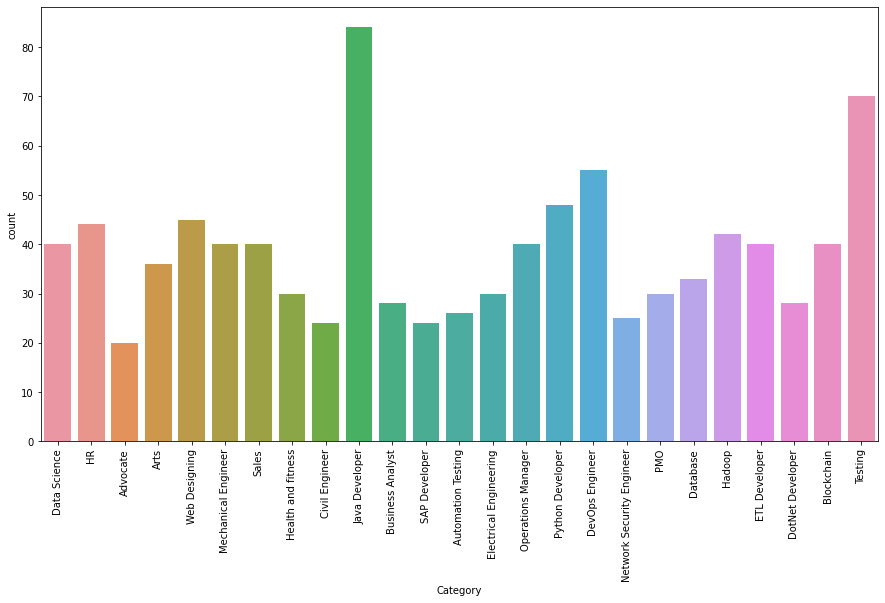

In [17]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(x='Category',data=data)   # to plot different category of a column use Countplot
plt.xticks(rotation=90)

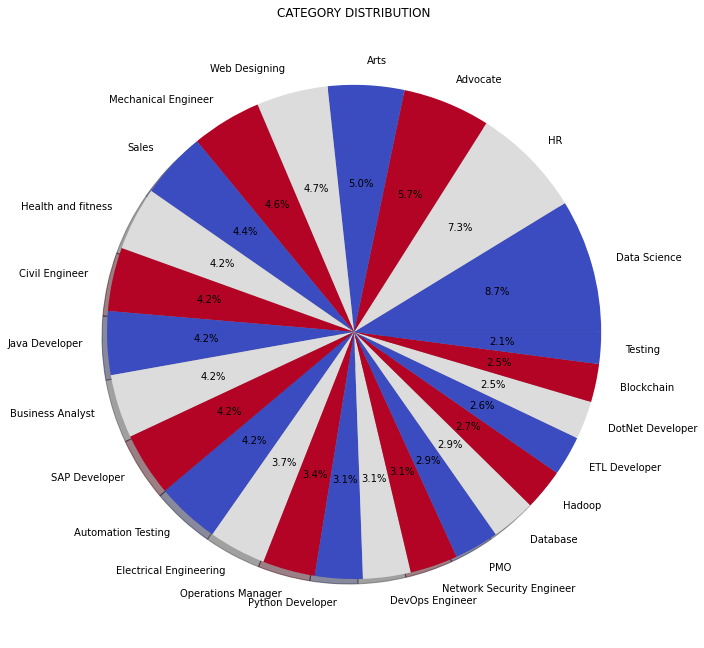

In [18]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
# Now I will create a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations:

In [19]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))